# Gradient Descent

In this notebook we will implement gradient descent for a single neuron. To simplify this as much as possible we will assume we have no bias `b = 0` and no activation function. The image below shows the neuron we will be coding and the relevant equations needed to update the weight using gradient descent. 

<img src="Gradient Descent Notebook-1.jpg" width=600 align="center">

The recipe we are following is:
1. make a prediction for our single sample
2. calculate the loss for this single sample
3. calculate the value of the derivative for this single sample
4. use the derivative and the learning rate to update the value of the weight
5. repeat until the loss is a minimum (that is, stops decreasing)

#### Stochastic Gradient Descent: A single sample

In [31]:
y = 4        # correct answer

x = 2        # we have one sample and one feature 
w = 0.1      # initial value for our weight

w_old = w

lr = 0.11 # the learning rate

n_iterations = 5 # number of iterations of gradient descent, that is, number of times we update w

for i in range(n_iterations):
    y_hat = w * x                 # make prediction using current value for w
    L = (y - y_hat)**2            # calculate the loss (our loss function = mean squared error)
    dL_dw = -2 * (y - y_hat)*x    # calculate derivative needed to update the weight (see image above) 
    w = w - lr*dL_dw              # update the weight
    diff = w - w_old              # calculate difference between the new and old values for w
    print(f"new weight: {w:.4f}  w_old: {w_old:.4f}    dL_dw: {dL_dw:.4f}    lr * dL_dw: {lr*dL_dw:.4f}    diff: {diff:.4f}   pred = y_hat = wx =: {y_hat:.4f}  Loss: {L:.4f}")
    w_old = w                     # store new w as old w for next iteration


new weight: 1.7720  w_old: 0.1000    dL_dw: -15.2000    lr * dL_dw: -1.6720    diff: 1.6720   pred = y_hat = wx =: 0.2000  Loss: 14.4400
new weight: 1.9726  w_old: 1.7720    dL_dw: -1.8240    lr * dL_dw: -0.2006    diff: 0.2006   pred = y_hat = wx =: 3.5440  Loss: 0.2079
new weight: 1.9967  w_old: 1.9726    dL_dw: -0.2189    lr * dL_dw: -0.0241    diff: 0.0241   pred = y_hat = wx =: 3.9453  Loss: 0.0030
new weight: 1.9996  w_old: 1.9967    dL_dw: -0.0263    lr * dL_dw: -0.0029    diff: 0.0029   pred = y_hat = wx =: 3.9934  Loss: 0.0000
new weight: 2.0000  w_old: 1.9996    dL_dw: -0.0032    lr * dL_dw: -0.0003    diff: 0.0003   pred = y_hat = wx =: 3.9992  Loss: 0.0000


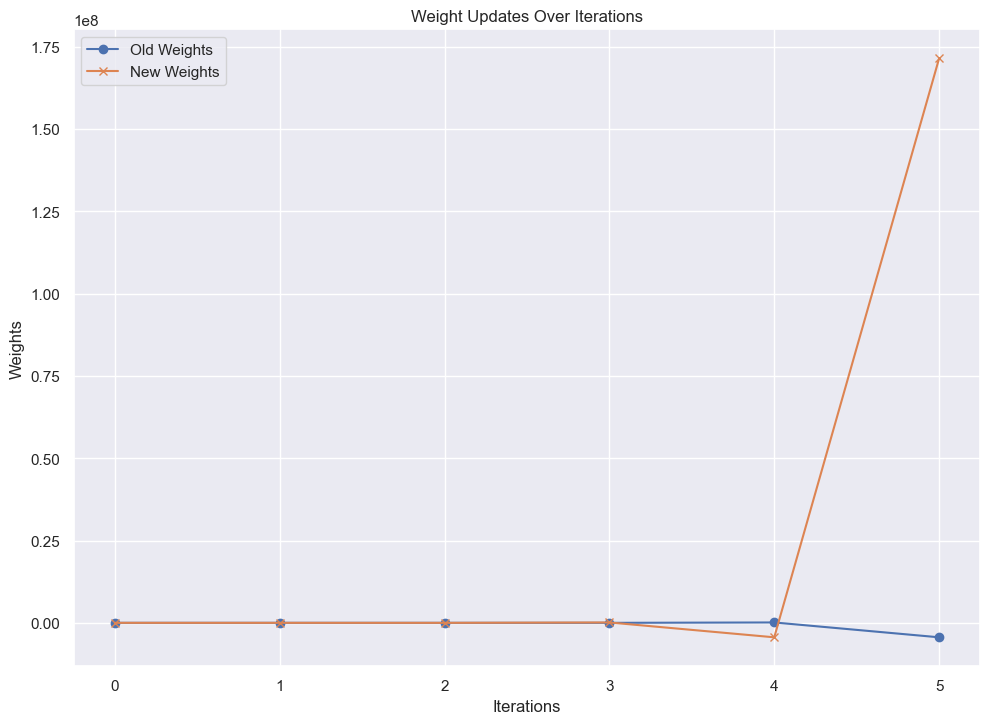

In [29]:
import matplotlib.pyplot as plt

# Initialize variables
y = 4
x = 2
w = 0.1
w_old = w
lr = 5
n_iterations = 5

# Lists to store weights
weights_new = [w]
weights_old = [w_old]

for i in range(n_iterations):
    y_hat = w * x
    L = (y - y_hat) ** 2
    dL_dw = -2 * (y - y_hat) * x
    w = w - lr * dL_dw
    weights_new.append(w)
    weights_old.append(w_old)
    w_old = w

# Plot the weights
iterations = list(range(n_iterations + 1))
plt.plot(iterations, weights_old, marker='o', label='Old Weights')
plt.plot(iterations, weights_new, marker='x', label='New Weights')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Weight Updates Over Iterations')
plt.legend()
plt.grid(True)
plt.show()


#### Stochastic Gradient Descent: Multiple samples

We will now repeat what we did above but now our training data will have 5 samples. 

In [9]:
X = [1, 2, 3, 3, 4]  # 5 samples with 1 feature value each
Y = [2, 1, 4, 2, 5] # correct answers for each sample

Let's plot the data so we can see what we are dealing with. 

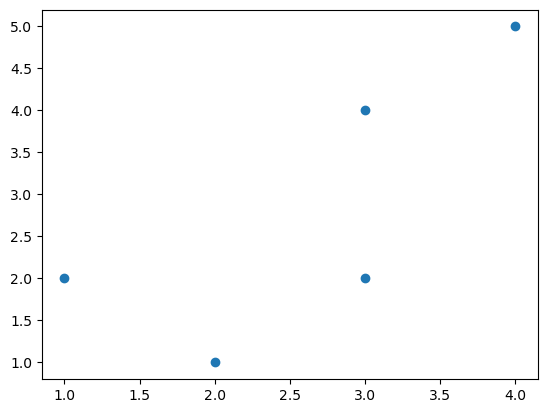

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

Using the plot above, convince yourself that for our neuron we will not be able to make `L = 0` as we could with the single sample. That is, there is no line we can draw that will pass through all the points (that is how the loss would equal to 0). 

In the following code we will apply stochastic gradient descent (update weight after each sample in the training data) to the training data of 5 samples we created above. 

In [20]:
w = 0.1 # initial value for our weight
lr = 0.01

n_epochs = 5
epoch_counter = 0
w_old = w

for i in range(n_epochs):
    epoch_counter = epoch_counter + 1 # use this to keep track of how many times we have gone through entire training data
    Total_L = 0                       # set the total_loss (sum of losses from each sample in training set) to 0 at start of each epoch
    for x, y in zip(X, Y):            # iterate through the training data one sample at a time
        y_hat = w * x                 # make prediction for current sample
        L = (y - y_hat)**2            # calculate loss for current sample
        Total_L = Total_L + L         # add the loss for current sample to total loss
        dL_dw = -2 * (y - y_hat)*x    # calculate derivative for current sample
        w = w - lr*dL_dw              # update the weight using the derivative and loss for current sample
    diff = w - w_old
    w_old = w
    print(f"Epoch {epoch_counter}:\t w: {w:.4f}  diff: {diff:.4f}  Total_L: {Total_L:.4f}")

Epoch 1:	 w: 0.6918  diff: 0.5918  Total_L: 27.9166
Epoch 2:	 w: 0.9357  diff: 0.2439  Total_L: 9.1201
Epoch 3:	 w: 1.0363  diff: 0.1006  Total_L: 6.0518
Epoch 4:	 w: 1.0777  diff: 0.0415  Total_L: 5.5822
Epoch 5:	 w: 1.0948  diff: 0.0171  Total_L: 5.5238


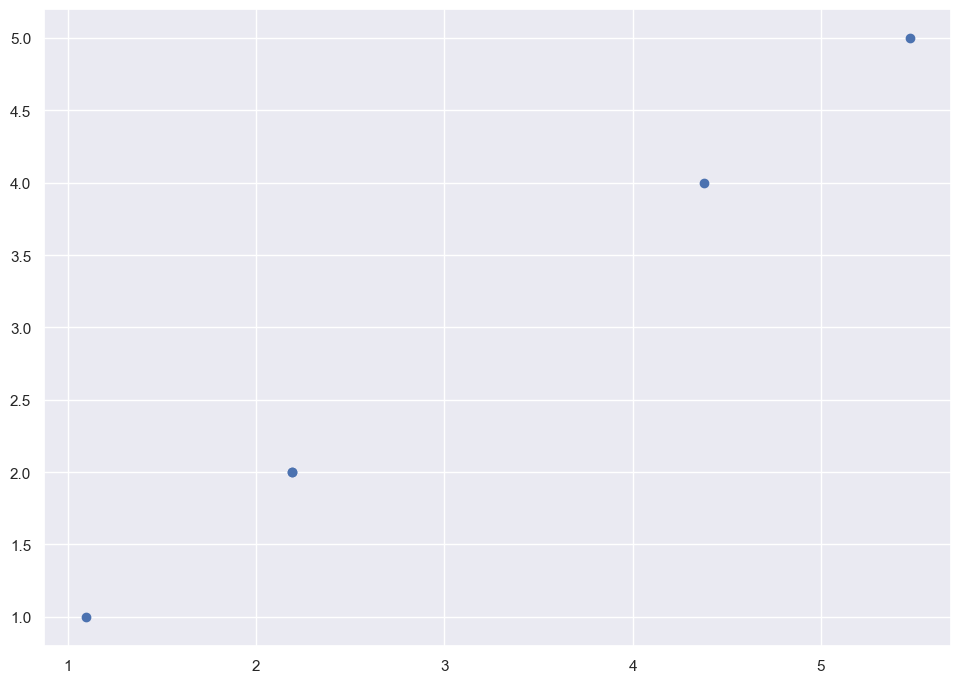

#### Compare with scikit-learn

Our neuron is really just performing linear regression since we have no activation function. So, let's perform linear regression on the data and see what value scikit-learn gives us for `w`. 

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_arr = np.array(X).reshape(-1, 1)
Y_arr = np.array(Y) 

lin_reg = LinearRegression()
lin_reg.fit(X_arr, Y_arr)

lin_reg.coef_

array([1.07692308])

### Batch Gradient Descent

We will now implement batch gradient descent where we will only make an update to the weight after we have processed all of the samples. The recipe is as follows: 
1. make predictions for all samples in our training data
2. calculate the average loss for all samples in our training data
3. calculate the average value of the derivative for all samples in our training data
4. update the value of the weight
5. repeat until the loss is a minimum (that is, stops decreasing)


In [13]:
X_new = np.array([1, 2, 3, 3, 4]).reshape(-1, 1) 
Y_new = np.array([2, 1, 4, 2, 5]).reshape(-1, 1) 

w = 0.1 
lr = 0.005 

n_epochs = 5

for i in range(n_epochs):
    Y_hat = w*X_new                                               # make predictions for all samples (remember X_new is an array with 5 samples)
    sample_losses = (Y_new - Y_hat)**2                            # calculate the loss for all 5 samples (result is an array with 5 values)
    Total_L = sample_losses.sum()                                 # calculate the average loss for the training data
    dLoss_dw = (-2 * np.multiply((Y_new - Y_hat), X_new)).mean()  # calculate the average of the derivatives
    w = w - lr*dLoss_dw                                           # update the weight using the average value of the derivative
    print(f"Epoch {i + 1}:\t w: {w:.4f}  Total_L: {Total_L:.4f}")

Epoch 1:	 w: 0.1762  Total_L: 41.9900
Epoch 2:	 w: 0.2465  Total_L: 36.4100
Epoch 3:	 w: 0.3112  Total_L: 31.6666
Epoch 4:	 w: 0.3710  Total_L: 27.6342
Epoch 5:	 w: 0.4260  Total_L: 24.2064


## Visualizing gradient descent

For the following code, you will need the `seaborn` and `ipywidgets` package. If you do not already have them installed, uncomment and run the code in the next cell. 

In [14]:
# !pip install seaborn
# !pip install ipywidgets

In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [16]:
w = -4      # initial value for our weight
w_old = w

lr = 0.01 # the learning rate

n_iterations = 301 # number of iterations of gradient descent, that is, number of times we update w

w_points = []
loss_points = []

for i in range(n_iterations):
    y_hat = w * 2                 
    L = (4 - y_hat)**2            
    dL_dw = -2 * (4 - y_hat)*2     
    w_points.append(w)
    loss_points.append(L)
    w = w - lr*dL_dw              
    diff = w - w_old              
    w_old = w                     

points = pd.DataFrame({'weight': w_points, 'Loss': loss_points})

In [17]:
set_weights = np.linspace(-6.0, 11.0, num=200)
set_losses = (4 - 2*set_weights)**2            
loss_plot = pd.DataFrame({'weights': set_weights, 'loss': set_losses})

In [18]:
def add_point(i):
    line = sns.lineplot(x=set_weights, y=set_losses)
    scatter = sns.scatterplot(data=points, x=points['weight'].iloc[:i], y=points['Loss'].iloc[:i], color='r', s=156)
    current_w = points['weight'].iloc[i]
    current_L = points['Loss'].iloc[i] 
    scatter.annotate(f'w = {current_w:.4f}', xy=(-2, 200), fontsize=24)
    scatter.annotate(f'L = {current_L:.4f}', xy=(4, 200), fontsize=24)

In [19]:
widgets.interact(add_point, i=widgets.IntSlider(min=1, max=300, step=1, value=0))

interactive(children=(IntSlider(value=1, description='i', max=300, min=1), Output()), _dom_classes=('widget-in…

<function __main__.add_point(i)>